# Interview Task -DS Intern

#### IMPORT LIBRARIES AND DATASETS

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
data=pd.read_csv(r'C:\Users\HP\Downloads\sales_data.csv')
pd.set_option("display.max_columns", None)
df=data.sort_values(by=['CustomerID'])
df

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,SATURDAY_ORDERS,SUNDAY_ORDERS,MONDAY_REVENUE,TUESDAY_REVENUE,WEDNESDAY_REVENUE,THURSDAY_REVENUE,FRIDAY_REVENUE,SATURDAY_REVENUE,SUNDAY_REVENUE,WEEK1_DAY01_DAY07_ORDERS,WEEK2_DAY08_DAY15_ORDERS,WEEK3_DAY16_DAY23_ORDERS,WEEK4_DAY24_DAY31_ORDERS,WEEK1_DAY01_DAY07_REVENUE,WEEK2_DAY08_DAY15_REVENUE,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
2266,1,61,34847.40,571.27,297.50,4.88,3-Mar-20,2-Sep-21,8.98,53,15,11,9,9,5,3,9,12819.41,5166.31,5877.44,1271.58,1459.05,324.48,7929.13,13,15,19,14,8143.65,5648.08,12946.22,8109.45,11,3,29,18,2293.90,1809.47,17749.01,12995.02
2876,2,59,32486.98,550.63,218.68,3.71,13-Feb-19,23-Jul-21,15.10,94,8,12,13,13,10,1,2,3829.95,7853.92,5725.95,6434.95,6855.22,1146.99,640.00,7,29,13,10,4332.96,11303.89,9094.21,7755.92,7,36,15,1,1350.28,23832.77,6893.93,410.00
2267,3,53,24178.97,456.21,43.97,0.83,15-Feb-18,2-Sep-21,24.43,53,3,18,5,12,5,9,1,833.00,5800.00,3692.00,6149.98,3162.99,3700.00,841.00,9,17,14,13,7964.00,5904.00,6431.97,3879.00,0,34,18,1,0.00,16030.98,7996.99,151.00
1153,4,84,18554.49,220.89,421.29,5.02,1-Oct-16,20-Oct-21,21.96,5,13,7,18,14,6,12,14,3683.21,1280.23,4628.14,2475.87,798.34,2037.93,3650.77,19,18,23,24,4070.74,3757.04,5609.60,5117.11,2,46,22,14,140.98,11795.40,4557.05,2061.06
3377,5,26,16884.99,649.42,54.89,2.11,27-Dec-15,17-Jun-21,76.88,130,2,4,1,9,2,2,6,1364.49,4030.00,331.00,3550.56,2078.99,1767.99,3761.96,6,1,7,12,6113.97,230.59,2265.46,8274.97,13,4,6,3,7700.24,1945.00,4751.96,2487.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297,248709,2,59.95,29.98,4.95,2.48,3-Jan-15,1-Sep-21,1216.50,54,0,0,1,0,0,1,0,0.00,0.00,55.00,0.00,0.00,4.95,0.00,2,0,0,0,59.95,0.00,0.00,0.00,0,1,0,1,0.00,55.00,0.00,4.95
3240,248710,2,59.94,29.97,10.94,5.47,13-Dec-14,28-Jun-21,1194.50,119,1,0,0,0,0,1,0,54.99,0.00,0.00,0.00,0.00,4.95,0.00,0,1,0,1,0.00,4.95,0.00,54.99,0,0,1,1,0.00,0.00,54.99,4.95
3360,259042,2,51.94,25.97,10.94,5.47,2-Aug-14,19-Jun-21,1256.50,128,0,0,0,0,0,2,0,0.00,0.00,0.00,0.00,0.00,51.94,0.00,1,0,1,0,4.95,0.00,46.99,0.00,0,1,0,1,0.00,4.95,0.00,46.99
3440,266024,2,45.94,22.97,10.94,5.47,14-Nov-14,15-Jun-21,1202.50,132,0,1,0,0,1,0,0,0.00,5.99,0.00,0.00,39.95,0.00,0.00,0,2,0,0,0.00,45.94,0.00,0.00,0,0,2,0,0.00,0.00,45.94,0.00


In [4]:
df.columns

Index(['CustomerID', 'TOTAL_ORDERS', 'REVENUE', 'AVERAGE_ORDER_VALUE',
       'CARRIAGE_REVENUE', 'AVERAGESHIPPING', 'FIRST_ORDER_DATE',
       'LATEST_ORDER_DATE', 'AVGDAYSBETWEENORDERS', 'DAYSSINCELASTORDER',
       'MONDAY_ORDERS', 'TUESDAY_ORDERS', 'WEDNESDAY_ORDERS',
       'THURSDAY_ORDERS', 'FRIDAY_ORDERS', 'SATURDAY_ORDERS', 'SUNDAY_ORDERS',
       'MONDAY_REVENUE', 'TUESDAY_REVENUE', 'WEDNESDAY_REVENUE',
       'THURSDAY_REVENUE', 'FRIDAY_REVENUE', 'SATURDAY_REVENUE',
       'SUNDAY_REVENUE', 'WEEK1_DAY01_DAY07_ORDERS',
       'WEEK2_DAY08_DAY15_ORDERS', 'WEEK3_DAY16_DAY23_ORDERS',
       'WEEK4_DAY24_DAY31_ORDERS', 'WEEK1_DAY01_DAY07_REVENUE',
       'WEEK2_DAY08_DAY15_REVENUE', 'WEEK3_DAY16_DAY23_REVENUE',
       'WEEK4_DAY24_DAY31_REVENUE', 'TIME_0000_0600_ORDERS',
       'TIME_0601_1200_ORDERS', 'TIME_1200_1800_ORDERS',
       'TIME_1801_2359_ORDERS', 'TIME_0000_0600_REVENUE',
       'TIME_0601_1200_REVENUE', 'TIME_1200_1800_REVENUE',
       'TIME_1801_2359_REVENUE'],
    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 2266 to 2341
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 5000 non-null   int64  
 1   TOTAL_ORDERS               5000 non-null   int64  
 2   REVENUE                    5000 non-null   float64
 3   AVERAGE_ORDER_VALUE        5000 non-null   float64
 4   CARRIAGE_REVENUE           5000 non-null   float64
 5   AVERAGESHIPPING            5000 non-null   float64
 6   FIRST_ORDER_DATE           5000 non-null   object 
 7   LATEST_ORDER_DATE          5000 non-null   object 
 8   AVGDAYSBETWEENORDERS       5000 non-null   float64
 9   DAYSSINCELASTORDER         5000 non-null   int64  
 10  MONDAY_ORDERS              5000 non-null   int64  
 11  TUESDAY_ORDERS             5000 non-null   int64  
 12  WEDNESDAY_ORDERS           5000 non-null   int64  
 13  THURSDAY_ORDERS            5000 non-null   in

In [6]:
df.describe()

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,SATURDAY_ORDERS,SUNDAY_ORDERS,MONDAY_REVENUE,TUESDAY_REVENUE,WEDNESDAY_REVENUE,THURSDAY_REVENUE,FRIDAY_REVENUE,SATURDAY_REVENUE,SUNDAY_REVENUE,WEEK1_DAY01_DAY07_ORDERS,WEEK2_DAY08_DAY15_ORDERS,WEEK3_DAY16_DAY23_ORDERS,WEEK4_DAY24_DAY31_ORDERS,WEEK1_DAY01_DAY07_REVENUE,WEEK2_DAY08_DAY15_REVENUE,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,40709.227800,12.87040,1681.523840,136.537378,46.036376,3.592574,163.159618,87.420000,1.629000,1.75440,1.798000,2.134000,1.94620,1.683400,1.925400,215.208336,233.510430,235.689294,265.949796,250.580554,219.64210,260.943330,2.99780,3.062600,3.230000,3.580000,378.638346,406.595734,421.826908,474.462852,1.028800,3.746200,4.434000,3.661400,131.062636,486.863868,584.731626,478.865710
std,49949.848017,12.67988,1998.618678,91.651569,47.879226,2.021360,259.699496,80.156513,2.236506,2.43394,2.464875,2.468048,2.65268,2.449972,2.315018,397.831999,411.941787,397.858311,383.890024,400.543113,376.13976,406.926075,3.25698,3.792461,3.921043,3.970384,515.590218,619.413277,643.449120,617.579321,2.174331,4.700234,5.044793,4.581894,331.289349,789.029911,804.290026,743.244248
min,1.000000,1.00000,38.500000,10.680000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1687.500000,3.00000,315.097500,83.025000,9.980000,2.500000,21.670000,7.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.00000,0.000000,0.000000,1.000000,63.990000,0.000000,0.000000,80.000000,0.000000,1.000000,1.000000,1.000000,0.000000,35.000000,89.990000,1.000000
50%,13765.000000,8.00000,966.725000,113.160000,24.985000,3.660000,57.635000,68.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,74.990000,75.990000,80.990000,144.590000,91.195000,62.41500,135.990000,2.00000,2.000000,2.000000,2.000000,190.985000,183.925000,194.990000,264.485000,0.000000,2.000000,3.000000,2.000000,0.000000,236.440000,299.840000,208.990000
75%,71891.500000,20.00000,2493.072500,160.272500,76.862500,4.790000,170.357500,171.250000,2.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,286.865000,310.972500,319.992500,344.357500,352.740000,297.28000,341.367500,4.00000,5.000000,5.000000,5.000000,513.012500,553.462500,604.085000,651.487500,1.000000,6.000000,7.000000,5.000000,131.282500,661.952500,797.032500,620.117500
max,277160.000000,156.00000,34847.400000,1578.880000,529.590000,35.990000,1409.500000,207.000000,19.000000,23.00000,29.000000,32.000000,26.00000,31.000000,23.000000,12819.410000,7853.920000,5877.440000,6434.950000,6855.220000,4642.97000,8366.350000,32.00000,42.000000,37.000000,53.000000,8143.650000,11303.890000,12946.220000,8274.970000,34.000000,61.000000,58.000000,64.000000,7700.240000,23832.770000,17749.010000,12995.020000


Average order is 13<br>
Average revenue is 1682<br>
Carriage revenue average 46<br>



In [7]:
df.isnull().sum()

CustomerID                   0
TOTAL_ORDERS                 0
REVENUE                      0
AVERAGE_ORDER_VALUE          0
CARRIAGE_REVENUE             0
AVERAGESHIPPING              0
FIRST_ORDER_DATE             0
LATEST_ORDER_DATE            0
AVGDAYSBETWEENORDERS         0
DAYSSINCELASTORDER           0
MONDAY_ORDERS                0
TUESDAY_ORDERS               0
WEDNESDAY_ORDERS             0
THURSDAY_ORDERS              0
FRIDAY_ORDERS                0
SATURDAY_ORDERS              0
SUNDAY_ORDERS                0
MONDAY_REVENUE               0
TUESDAY_REVENUE              0
WEDNESDAY_REVENUE            0
THURSDAY_REVENUE             0
FRIDAY_REVENUE               0
SATURDAY_REVENUE             0
SUNDAY_REVENUE               0
WEEK1_DAY01_DAY07_ORDERS     0
WEEK2_DAY08_DAY15_ORDERS     0
WEEK3_DAY16_DAY23_ORDERS     0
WEEK4_DAY24_DAY31_ORDERS     0
WEEK1_DAY01_DAY07_REVENUE    0
WEEK2_DAY08_DAY15_REVENUE    0
WEEK3_DAY16_DAY23_REVENUE    0
WEEK4_DAY24_DAY31_REVENUE    0
TIME_000

We will have to check the missing data.

In [8]:
# Let's see if we have duplicated entries in the data
df.duplicated().sum()

0

#### VISUALIZE AND EXPLORE DATASET

##### Prepare new columns of average order value for day,week and time

In [9]:
df["MONDAY_AVERAGE_ORDER_VALUE"] = df["MONDAY_REVENUE"]/df["MONDAY_ORDERS"]
df["TUESDAY_AVERAGE_ORDER_VALUE"] = df["TUESDAY_REVENUE"]/df["TUESDAY_ORDERS"]
df["WEDNESDAY_AVERAGE_ORDER_VALUE"] = df["WEDNESDAY_REVENUE"]/df["WEDNESDAY_ORDERS"]
df["THURSDAY_AVERAGE_ORDER_VALUE"] = df["THURSDAY_REVENUE"]/df["THURSDAY_ORDERS"]
df["FRIDAY_AVERAGE_ORDER_VALUE"] = df["FRIDAY_REVENUE"]/df["FRIDAY_ORDERS"]
df["SATURDAY_AVERAGE_ORDER_VALUE"] = df["SATURDAY_REVENUE"]/df["SATURDAY_ORDERS"]
df["SUNDAY_AVERAGE_ORDER_VALUE"] = df["SUNDAY_REVENUE"]/df["SUNDAY_ORDERS"]

In [10]:
data1=df[["CustomerID",'MONDAY_AVERAGE_ORDER_VALUE', 'TUESDAY_AVERAGE_ORDER_VALUE', 'WEDNESDAY_AVERAGE_ORDER_VALUE',
       'THURSDAY_AVERAGE_ORDER_VALUE', 'FRIDAY_AVERAGE_ORDER_VALUE', 'SATURDAY_AVERAGE_ORDER_VALUE', 'SUNDAY_AVERAGE_ORDER_VALUE']]
data1=data1.sort_values(by=['CustomerID'])
df_reset1=data1.set_index('CustomerID')
df_reset1

,MONDAY_AVERAGE_ORDER_VALUE,TUESDAY_AVERAGE_ORDER_VALUE,WEDNESDAY_AVERAGE_ORDER_VALUE,THURSDAY_AVERAGE_ORDER_VALUE,FRIDAY_AVERAGE_ORDER_VALUE,SATURDAY_AVERAGE_ORDER_VALUE,SUNDAY_AVERAGE_ORDER_VALUE
CustomerID,,,,,,,
1,854.627333,469.664545,653.048889,141.286667,291.810000,108.160000,881.014444
2,478.743750,654.493333,440.457692,494.996154,685.522000,1146.990000,320.000000
3,277.666667,322.222222,738.400000,512.498333,632.598000,411.111111,841.000000
4,283.323846,182.890000,257.118889,176.847857,133.056667,169.827500,260.769286
5,682.245000,1007.500000,331.000000,394.506667,1039.495000,883.995000,626.993333
...,...,...,...,...,...,...,...
248709,NaN,NaN,55.000000,NaN,NaN,4.950000,NaN
248710,54.990000,NaN,NaN,NaN,NaN,4.950000,NaN
259042,NaN,NaN,NaN,NaN,NaN,25.970000,NaN


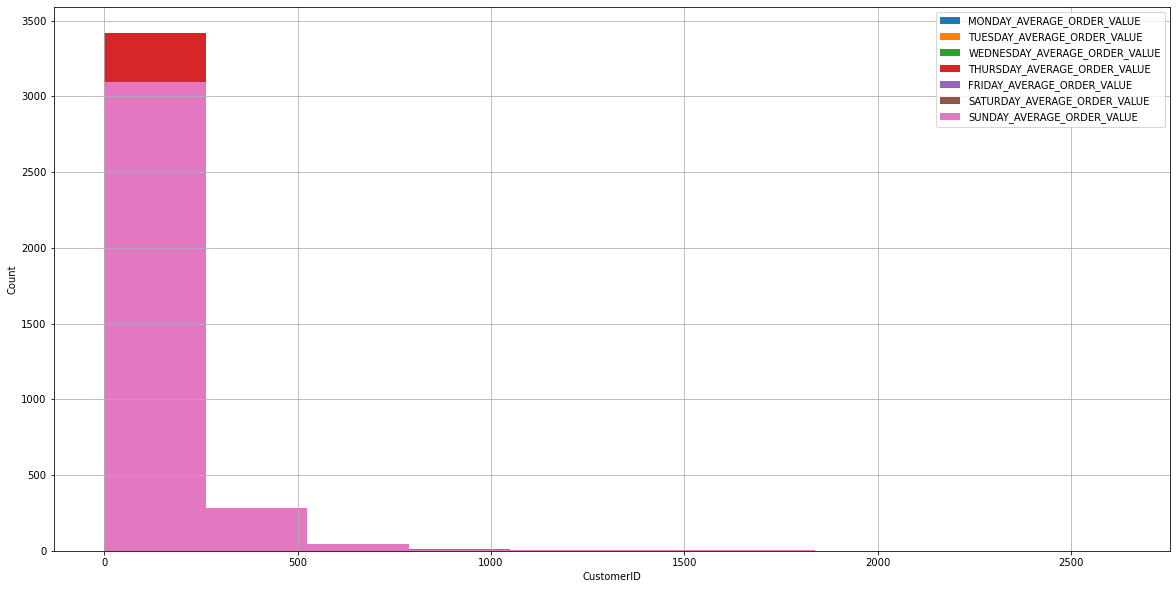

In [11]:
ax = (df_reset1).plot(
kind='hist',
figsize=(20, 10),
grid=True
)
ax.set_xlabel('CustomerID')
ax.set_ylabel('Count')
plt.show()

From this histogram , we can say that most of people like to oreder on sunday and there are some customer like to order on Thursday

In [12]:
df["WEEK1_DAY01_DAY07_AVERAGE_ORDER_VALUE"] = df["WEEK1_DAY01_DAY07_REVENUE"]/df["WEEK1_DAY01_DAY07_ORDERS"]
df["WEEK2_DAY08_DAY15_AVERAGE_ORDER_VALUE"] = df["WEEK2_DAY08_DAY15_REVENUE"]/df["WEEK2_DAY08_DAY15_ORDERS"]
df["WEEK3_DAY16_DAY23_AVERAGE_ORDER_VALUE"] = df["WEEK3_DAY16_DAY23_REVENUE"]/df["WEEK3_DAY16_DAY23_ORDERS"]
df["WEEK4_DAY24_DAY31_AVERAGE_ORDER_VALUE"] = df["WEEK4_DAY24_DAY31_REVENUE"]/df["WEEK4_DAY24_DAY31_ORDERS"]

In [13]:
data2=df[["CustomerID", 'WEEK1_DAY01_DAY07_AVERAGE_ORDER_VALUE','WEEK2_DAY08_DAY15_AVERAGE_ORDER_VALUE',"WEEK3_DAY16_DAY23_AVERAGE_ORDER_VALUE","WEEK4_DAY24_DAY31_AVERAGE_ORDER_VALUE"]]
data2=data2.sort_values(by=['CustomerID'])
df_reset2=data2.set_index('CustomerID')
df_reset2

,WEEK1_DAY01_DAY07_AVERAGE_ORDER_VALUE,WEEK2_DAY08_DAY15_AVERAGE_ORDER_VALUE,WEEK3_DAY16_DAY23_AVERAGE_ORDER_VALUE,WEEK4_DAY24_DAY31_AVERAGE_ORDER_VALUE
CustomerID,,,,
1,626.434615,376.538667,681.380000,579.246429
2,618.994286,389.789310,699.554615,775.592000
3,884.888889,347.294118,459.426429,298.384615
4,214.249474,208.724444,243.895652,213.212917
5,1018.995000,230.590000,323.637143,689.580833
...,...,...,...,...
248709,29.975000,NaN,NaN,NaN
248710,NaN,4.950000,NaN,54.990000
259042,4.950000,NaN,46.990000,NaN


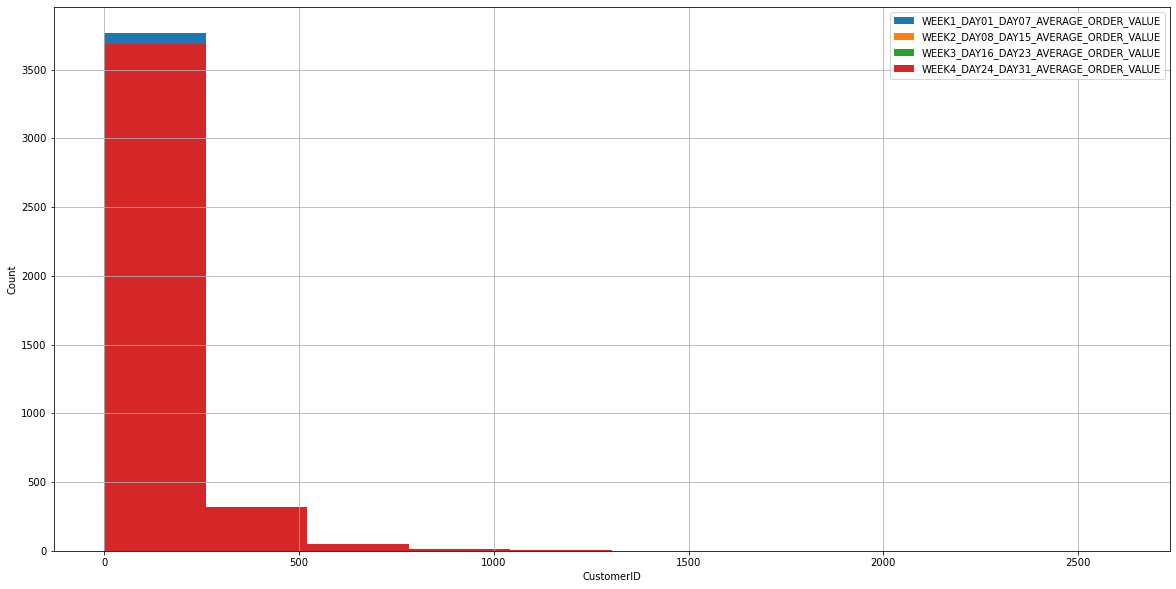

In [14]:
ax = (df_reset2).plot(
kind='hist',
figsize=(20, 10),
grid=True
)
ax.set_xlabel('CustomerID')
ax.set_ylabel('Count')
plt.show()

From this histogram , we can say that most of customer like to order in week 4 and there are few customers like to order on week 1

In [15]:
df["TIME_0000_0600_AVERAGE_ORDER_VALUE"] = df["TIME_0000_0600_REVENUE"]/df["TIME_0000_0600_ORDERS"]
df["TIME_0601_1200_AVERAGE_ORDER_VALUE"] = df["TIME_0601_1200_REVENUE"]/df["TIME_0601_1200_ORDERS"]
df["TIME_1200_1800_AVERAGE_ORDER_VALUE"] = df["TIME_1200_1800_REVENUE"]/df["TIME_1200_1800_ORDERS"]
df["TIME_1801_2359_AVERAGE_ORDER_VALUE"] = df["TIME_1801_2359_REVENUE"]/df["TIME_1801_2359_ORDERS"]

In [16]:
data3=df[["CustomerID", 'TIME_0000_0600_AVERAGE_ORDER_VALUE','TIME_0601_1200_AVERAGE_ORDER_VALUE',"TIME_1200_1800_AVERAGE_ORDER_VALUE","TIME_1801_2359_AVERAGE_ORDER_VALUE"]]
data3=data3.sort_values(by=['CustomerID'])
df_reset3=data3.set_index('CustomerID')
df_reset3

,TIME_0000_0600_AVERAGE_ORDER_VALUE,TIME_0601_1200_AVERAGE_ORDER_VALUE,TIME_1200_1800_AVERAGE_ORDER_VALUE,TIME_1801_2359_AVERAGE_ORDER_VALUE
CustomerID,,,,
1,208.536364,603.156667,612.034828,721.945556
2,192.897143,662.021389,459.595333,410.000000
3,NaN,471.499412,444.277222,151.000000
4,70.490000,256.421739,207.138636,147.218571
5,592.326154,486.250000,791.993333,829.263333
...,...,...,...,...
248709,NaN,55.000000,NaN,4.950000
248710,NaN,NaN,54.990000,4.950000
259042,NaN,4.950000,NaN,46.990000


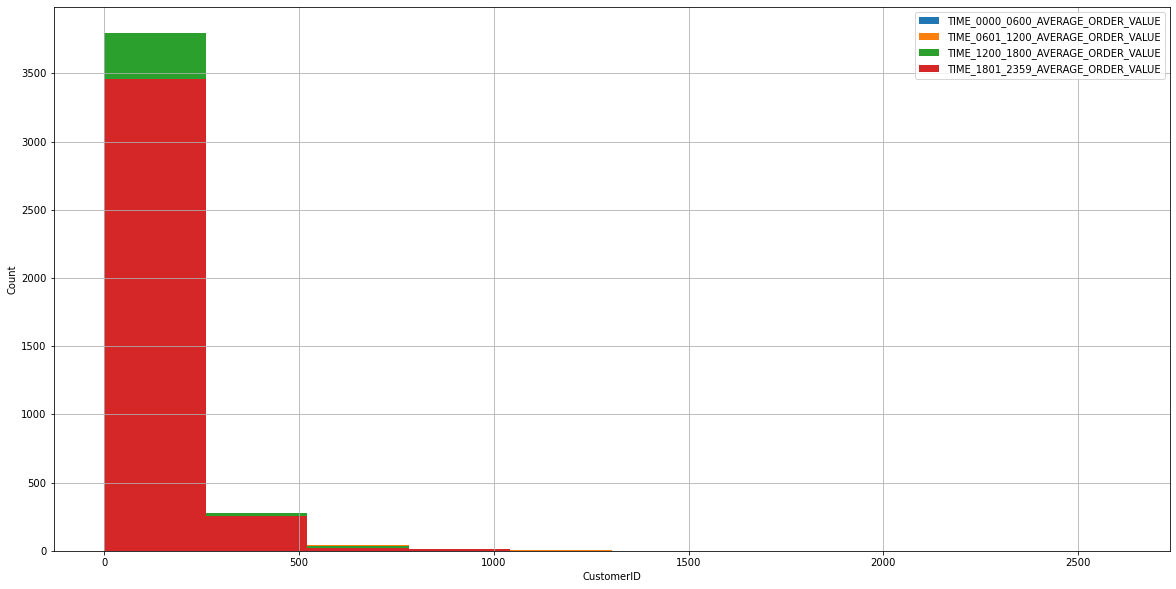

In [17]:
ax = (df_reset3).plot(
kind='hist',
figsize=(20, 10),
grid=True
)
ax.set_xlabel('CustomerID')
ax.set_ylabel('Count')
plt.show()

From this histogram , we can say that all customer like to order on after noon time and  all customer like to purchase on evening time also. 

From all this visualization , we can say that the company have more revenue on last sunday of each month at after noon.

In [18]:
pattern = "Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec"
filter2 = df['LATEST_ORDER_DATE'].str.contains(pattern)
df=df[filter2]
df['LATEST_ORDER_DATE'] = pd.to_datetime(df['LATEST_ORDER_DATE'])

In [19]:
df['FIRST_ORDER_DATE'] = pd.to_datetime(df['FIRST_ORDER_DATE'])
df_=df.copy()
df_=df_.sort_values(by=['FIRST_ORDER_DATE'])
df_

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,SATURDAY_ORDERS,SUNDAY_ORDERS,MONDAY_REVENUE,TUESDAY_REVENUE,WEDNESDAY_REVENUE,THURSDAY_REVENUE,FRIDAY_REVENUE,SATURDAY_REVENUE,SUNDAY_REVENUE,WEEK1_DAY01_DAY07_ORDERS,WEEK2_DAY08_DAY15_ORDERS,WEEK3_DAY16_DAY23_ORDERS,WEEK4_DAY24_DAY31_ORDERS,WEEK1_DAY01_DAY07_REVENUE,WEEK2_DAY08_DAY15_REVENUE,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,MONDAY_AVERAGE_ORDER_VALUE,TUESDAY_AVERAGE_ORDER_VALUE,WEDNESDAY_AVERAGE_ORDER_VALUE,THURSDAY_AVERAGE_ORDER_VALUE,FRIDAY_AVERAGE_ORDER_VALUE,SATURDAY_AVERAGE_ORDER_VALUE,SUNDAY_AVERAGE_ORDER_VALUE,WEEK1_DAY01_DAY07_AVERAGE_ORDER_VALUE,WEEK2_DAY08_DAY15_AVERAGE_ORDER_VALUE,WEEK3_DAY16_DAY23_AVERAGE_ORDER_VALUE,WEEK4_DAY24_DAY31_AVERAGE_ORDER_VALUE,TIME_0000_0600_AVERAGE_ORDER_VALUE,TIME_0601_1200_AVERAGE_ORDER_VALUE,TIME_1200_1800_AVERAGE_ORDER_VALUE,TIME_1801_2359_AVERAGE_ORDER_VALUE
1151,110135,4,206.45,51.61,4.95,1.24,2014-02-01,2021-10-21,704.75,4,0,0,1,2,0,1,0,0.00,0.00,53.95,93.50,0.00,59.00,0.00,2,0,2,0,112.95,0.00,93.50,0.00,2,1,0,1,93.50,53.95,0.00,59.00,NaN,NaN,53.95,46.750,NaN,59.000000,NaN,56.475000,NaN,46.750,NaN,46.75,53.950000,NaN,59.000000
3192,5184,11,1549.02,140.82,13.97,1.27,2014-02-01,2021-07-01,246.09,116,1,2,1,1,2,2,2,206.10,262.99,378.00,73.99,88.99,290.00,248.95,3,1,2,5,586.99,224.00,88.99,649.04,0,3,1,7,0.00,208.94,129.00,1211.08,206.100,131.495000,378.00,73.990,44.495000,145.000000,124.475,195.663333,224.000000,44.495,129.808000,NaN,69.646667,129.0000,173.011429
3682,27134,8,652.10,81.51,28.90,3.61,2014-02-02,2021-05-15,332.38,163,1,1,1,2,0,2,1,38.99,39.95,67.99,270.99,0.00,156.18,78.00,2,3,1,2,245.00,184.13,79.99,142.98,1,4,1,2,76.19,264.97,167.00,143.94,38.990,39.950000,67.99,135.495,NaN,78.090000,78.000,122.500000,61.376667,79.990,71.490000,76.19,66.242500,167.0000,71.970000
3518,78,31,7438.61,239.96,92.81,2.99,2014-02-02,2021-06-04,86.42,143,10,3,2,1,3,7,5,2643.32,606.48,927.00,102.99,138.98,1396.56,1623.28,8,7,10,6,1076.44,663.96,3690.15,2008.06,1,11,8,11,729.00,1713.63,2245.54,2750.44,264.332,202.160000,463.50,102.990,46.326667,199.508571,324.656,134.555000,94.851429,369.015,334.676667,729.00,155.784545,280.6925,250.040000
1946,13952,10,959.66,95.97,54.91,5.49,2014-02-02,2021-09-23,279.00,32,1,3,0,3,1,1,1,94.09,403.97,0.00,184.17,136.49,71.99,68.95,3,1,4,2,208.93,69.09,515.56,166.08,0,1,4,5,0.00,193.99,428.56,337.11,94.090,134.656667,NaN,61.390,136.490000,71.990000,68.950,69.643333,69.090000,128.890,83.040000,NaN,193.990000,107.1400,67.422000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,44839,1,463.25,463.25,0.00,0.00,2021-10-24,2021-10-24,0.00,1,0,0,0,0,0,0,1,0.00,0.00,0.00,0.00,0.00,0.00,463.25,0,0,0,1,0.00,0.00,0.00,463.25,0,1,0,0,0.00,463.25,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,463.250,NaN,NaN,NaN,463.250000,NaN,463.250000,NaN,NaN
921,105207,1,216.99,216.99,6.99,6.99,2021-10-24,2021-10-24,0.00,1,0,0,0,0,0,0,1,0.00,0.00,0.00,0.00,0.00,0.00,216.99,0,0,0,1,0.00,0.00,0.00,216.99,1,0,0,0,216.99,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,216.990,NaN,NaN,NaN,216.990000,216.99,NaN,NaN,NaN
599,60620,1,365.00,365.00,0.00,0.00,2021-10-24,2021-10-24,0.00,1,0,0,0,0,0,0,1,0.00,0.00,0.00,0.00,0.00,0.00,365.00,0,0,0,1,0.00,0.00,0.00,365.00,0,0,0,1,0.00,0.00,0.00,365.00,NaN,NaN,NaN,NaN,NaN,NaN,365.000,NaN,NaN,NaN,365.000000,NaN,NaN,NaN,365.000000
738,78163,1,291.99,291.99,6.99,6.99,2021-10-24,2021-10-24,0.00,1,0,0,0,0,0,0,1,0.00,0.00,0.00,0.00,0.00,0.00,291.99,0,0,0,1,0.00,0.00,0.00,291.

In [20]:
df_=df.copy()
df_=df_.sort_values(by=['LATEST_ORDER_DATE'])
df_

,CustomerID,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,MONDAY_ORDERS,TUESDAY_ORDERS,WEDNESDAY_ORDERS,THURSDAY_ORDERS,FRIDAY_ORDERS,SATURDAY_ORDERS,SUNDAY_ORDERS,MONDAY_REVENUE,TUESDAY_REVENUE,WEDNESDAY_REVENUE,THURSDAY_REVENUE,FRIDAY_REVENUE,SATURDAY_REVENUE,SUNDAY_REVENUE,WEEK1_DAY01_DAY07_ORDERS,WEEK2_DAY08_DAY15_ORDERS,WEEK3_DAY16_DAY23_ORDERS,WEEK4_DAY24_DAY31_ORDERS,WEEK1_DAY01_DAY07_REVENUE,WEEK2_DAY08_DAY15_REVENUE,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE,MONDAY_AVERAGE_ORDER_VALUE,TUESDAY_AVERAGE_ORDER_VALUE,WEDNESDAY_AVERAGE_ORDER_VALUE,THURSDAY_AVERAGE_ORDER_VALUE,FRIDAY_AVERAGE_ORDER_VALUE,SATURDAY_AVERAGE_ORDER_VALUE,SUNDAY_AVERAGE_ORDER_VALUE,WEEK1_DAY01_DAY07_AVERAGE_ORDER_VALUE,WEEK2_DAY08_DAY15_AVERAGE_ORDER_VALUE,WEEK3_DAY16_DAY23_AVERAGE_ORDER_VALUE,WEEK4_DAY24_DAY31_AVERAGE_ORDER_VALUE,TIME_0000_0600_AVERAGE_ORDER_VALUE,TIME_0601_1200_AVERAGE_ORDER_VALUE,TIME_1200_1800_AVERAGE_ORDER_VALUE,TIME_1801_2359_AVERAGE_ORDER_VALUE
4438,90531,2,253.18,126.59,11.98,5.99,2020-09-12,2021-04-01,100.50,207,0,0,0,1,0,1,0,0.00,0.00,0.00,140.09,0.00,113.09,0.00,1,1,0,0,140.09,113.09,0.00,0.00,1,1,0,0,113.09,140.09,0.00,0.00,NaN,NaN,NaN,140.09,NaN,113.09,NaN,140.090000,113.09,NaN,NaN,113.09,140.090,NaN,NaN
4473,95081,1,240.99,240.99,4.99,4.99,2021-04-01,2021-04-01,0.00,207,0,0,0,1,0,0,0,0.00,0.00,0.00,240.99,0.00,0.00,0.00,1,0,0,0,240.99,0.00,0.00,0.00,0,0,0,1,0.00,0.00,0.00,240.99,NaN,NaN,NaN,240.99,NaN,NaN,NaN,240.990000,NaN,NaN,NaN,NaN,NaN,NaN,240.990000
4474,95273,4,240.48,60.12,11.98,3.00,2019-09-18,2021-04-01,140.25,207,0,1,2,1,0,0,0,0.00,29.99,142.50,67.99,0.00,0.00,0.00,1,0,1,2,67.99,0.00,110.00,62.49,0,1,0,3,0.00,67.99,0.00,172.49,NaN,29.99,71.25,67.99,NaN,NaN,NaN,67.990000,NaN,110.00,31.245000,NaN,67.990,NaN,57.496667
4475,95300,3,240.39,80.13,7.99,2.66,2018-12-02,2021-04-01,283.67,207,1,0,0,1,0,0,1,21.00,0.00,0.00,198.09,0.00,0.00,21.30,2,1,0,0,219.39,21.00,0.00,0.00,0,2,0,1,0.00,219.39,0.00,21.00,21.00,NaN,NaN,198.09,NaN,NaN,21.300,109.695000,21.00,NaN,NaN,NaN,109.695,NaN,21.000000
4476,95357,2,240.08,120.04,9.98,4.99,2020-12-09,2021-04-01,56.50,207,0,0,1,1,0,0,0,0.00,0.00,172.99,67.09,0.00,0.00,0.00,1,1,0,0,67.09,172.99,0.00,0.00,0,1,1,0,0.00,172.99,67.09,0.00,NaN,NaN,172.99,67.09,NaN,NaN,NaN,67.090000,172.99,NaN,NaN,NaN,172.990,67.09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,63945,3,349.20,116.40,0.00,0.00,2021-09-14,2021-10-24,13.33,1,0,1,0,0,0,0,2,0.00,174.60,0.00,0.00,0.00,0.00,174.60,0,1,0,2,0.00,174.60,0.00,174.60,0,0,0,3,0.00,0.00,0.00,349.20,NaN,174.60,NaN,NaN,NaN,NaN,87.300,NaN,174.60,NaN,87.300000,NaN,NaN,NaN,116.400000
626,63938,6,349.31,58.22,20.96,3.49,2017-11-16,2021-10-24,239.67,1,2,0,1,1,0,1,1,139.58,0.00,50.49,25.00,0.00,39.00,95.24,3,0,1,2,178.58,0.00,25.00,145.73,0,4,0,2,0.00,269.82,0.00,79.49,69.79,NaN,50.49,25.00,NaN,39.00,95.240,59.526667,NaN,25.00,72.865000,NaN,67.455,NaN,39.745000
625,63619,3,350.23,116.74,10.98,3.66,2019-11-07,2021-10-24,239.00,1,0,0,1,1,0,0,1,0.00,0.00,157.99,85.99,0.00,0.00,106.25,2,0,0,1,243.98,0.00,0.00,106.25,0,0,1,2,0.00,0.00,106.25,243.98,NaN,NaN,157.99,85.99,NaN,NaN,106.250,121.990000,NaN,NaN,106.250000,NaN,NaN,106.25,121.990000
632,64342,3,347.48,115.83,9.98,3.33,2016-11-25,2021-10-24,598.00,1,0,1,0,0,1,0,1,0.00,160.00,0.00,0.00,56.49,0.00,130.99,0,0,0,3,0.00,0.00,0.00,347.48,0,1,1,1,0.00,130.99,56.49,160.00,NaN,160.00,NaN,NaN,56.49,NaN,130.990,NaN,NaN,NaN,115.826667,NaN,130.990,56.49,160.000000


In [21]:
df_0=df_.groupby(['FIRST_ORDER_DATE'])['CustomerID'].count()
df_0=pd.DataFrame(df_0)
df_0['CustomerID']

FIRST_ORDER_DATE
2014-02-01      2
2014-02-02      5
2014-02-03      8
2014-02-04      8
2014-02-05      6
             ... 
2021-10-20      4
2021-10-21      4
2021-10-22      1
2021-10-23      5
2021-10-24    164
Name: CustomerID, Length: 1928, dtype: int64

In [22]:

df_1=df_.groupby(['LATEST_ORDER_DATE'])['CustomerID'].count()
df_1=pd.DataFrame(df_1)
df_1['CustomerID']


LATEST_ORDER_DATE
2021-04-01    1001
2021-04-02       5
2021-04-03      10
2021-04-04       9
2021-04-05       6
              ... 
2021-10-20      41
2021-10-21      38
2021-10-22      40
2021-10-23      45
2021-10-24    1030
Name: CustomerID, Length: 207, dtype: int64

In [25]:
import plotly.offline as pyoff
import plotly.graph_objects as go

In [27]:
plot_data = [
    go.Scatter(
        x=df_0.index,
        y=df_0['CustomerID'],
        name='First Order Date',
        #x_axis="OTI",
        #y_axis="time",
    ),
    go.Scatter(
        x=df_1.index,
        y=df_1['CustomerID'],
        name='Latest Order Date'
    )
    
]
plot_layout = go.Layout(
        title='Day-wise',
        yaxis_title='Count',
        xaxis_title='Time',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

### Select the required columns.

In [28]:
df=df[['AVERAGE_ORDER_VALUE',
       'CARRIAGE_REVENUE', 'AVERAGESHIPPING','AVGDAYSBETWEENORDERS', 'DAYSSINCELASTORDER' ]]

df

,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER
2266,571.27,297.50,4.88,8.98,53
2876,550.63,218.68,3.71,15.10,94
2267,456.21,43.97,0.83,24.43,53
1153,220.89,421.29,5.02,21.96,5
3377,649.42,54.89,2.11,76.88,130
...,...,...,...,...,...
2297,29.98,4.95,2.48,1216.50,54
3240,29.97,10.94,5.47,1194.50,119
3360,25.97,10.94,5.47,1256.50,128
3440,22.97,10.94,5.47,1202.50,132


KDE demonstrates the probability density at different values in a continuous variable.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\HP\anaconda3\lib\site-packages\seabor

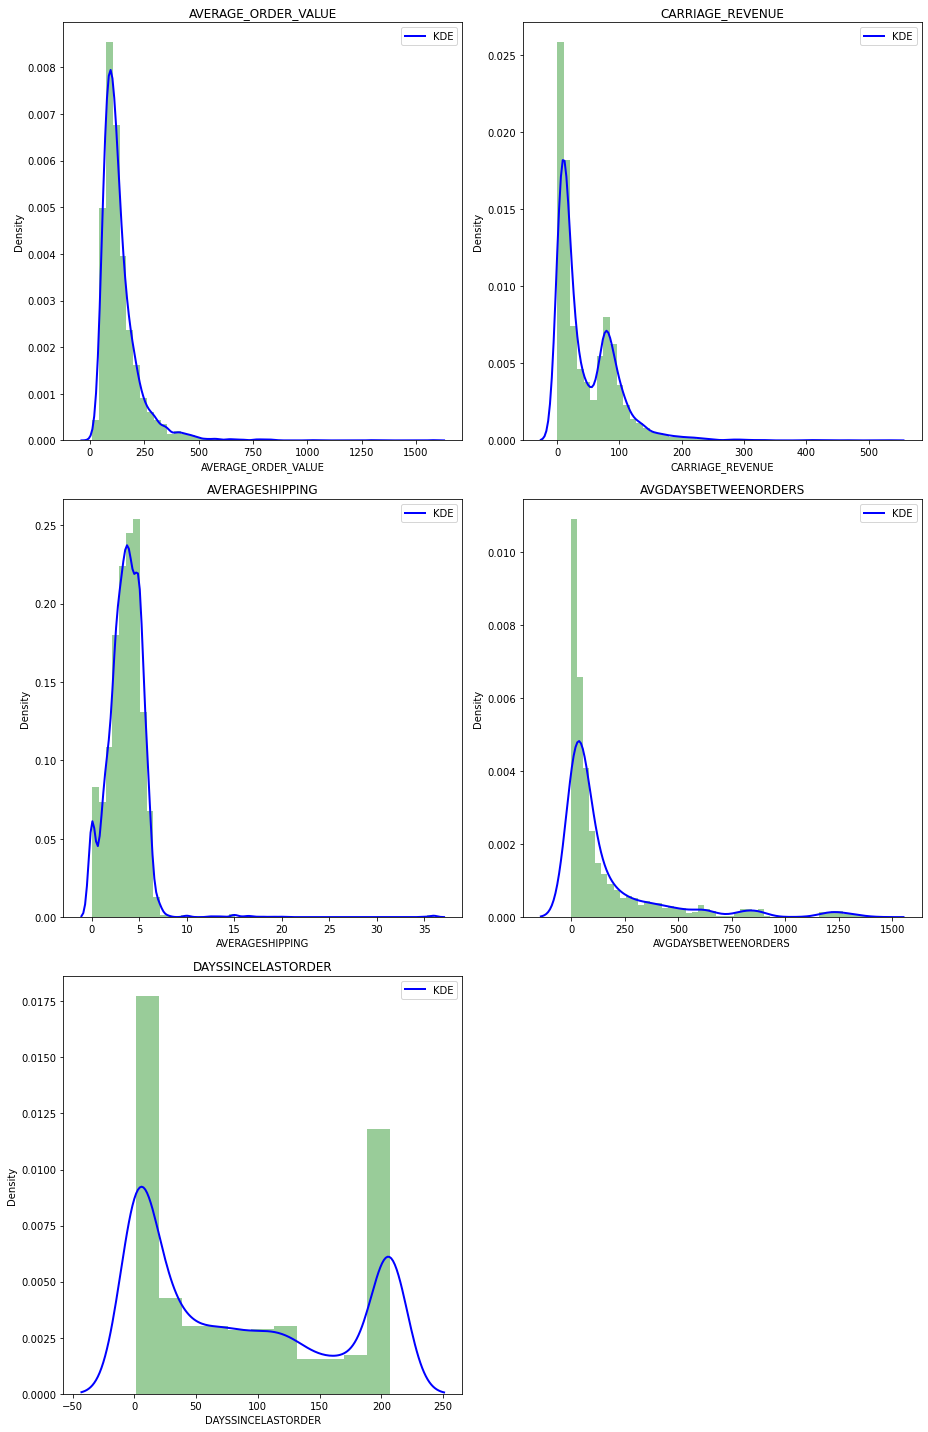

In [29]:
plt.figure(figsize=(13,20))
for i in range(len(df.columns)):
    plt.subplot(len(df.columns)//2+1,2,i+1)
    sns.distplot(df[df.columns[i]], hist_kws={'color':'g'}, kde_kws={'color':'b', 'lw':2, 'label':'KDE'})
    plt.title(df.columns[i])
    plt.legend()
plt.tight_layout()

Average order value of most of customer is almost 125.<br>
For Carriage revenue and days since last order, There two distict group of customers .<br>
Very small number of customers have large day gap in betweeen orders.

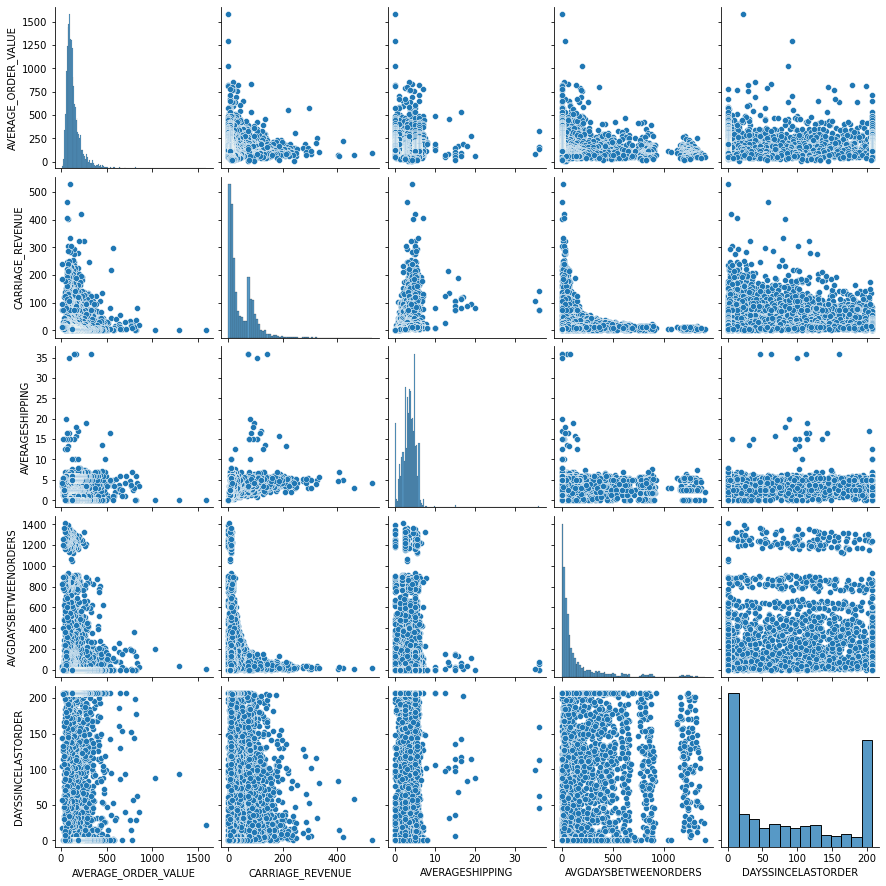

In [30]:
sns.pairplot(df)

<AxesSubplot:>

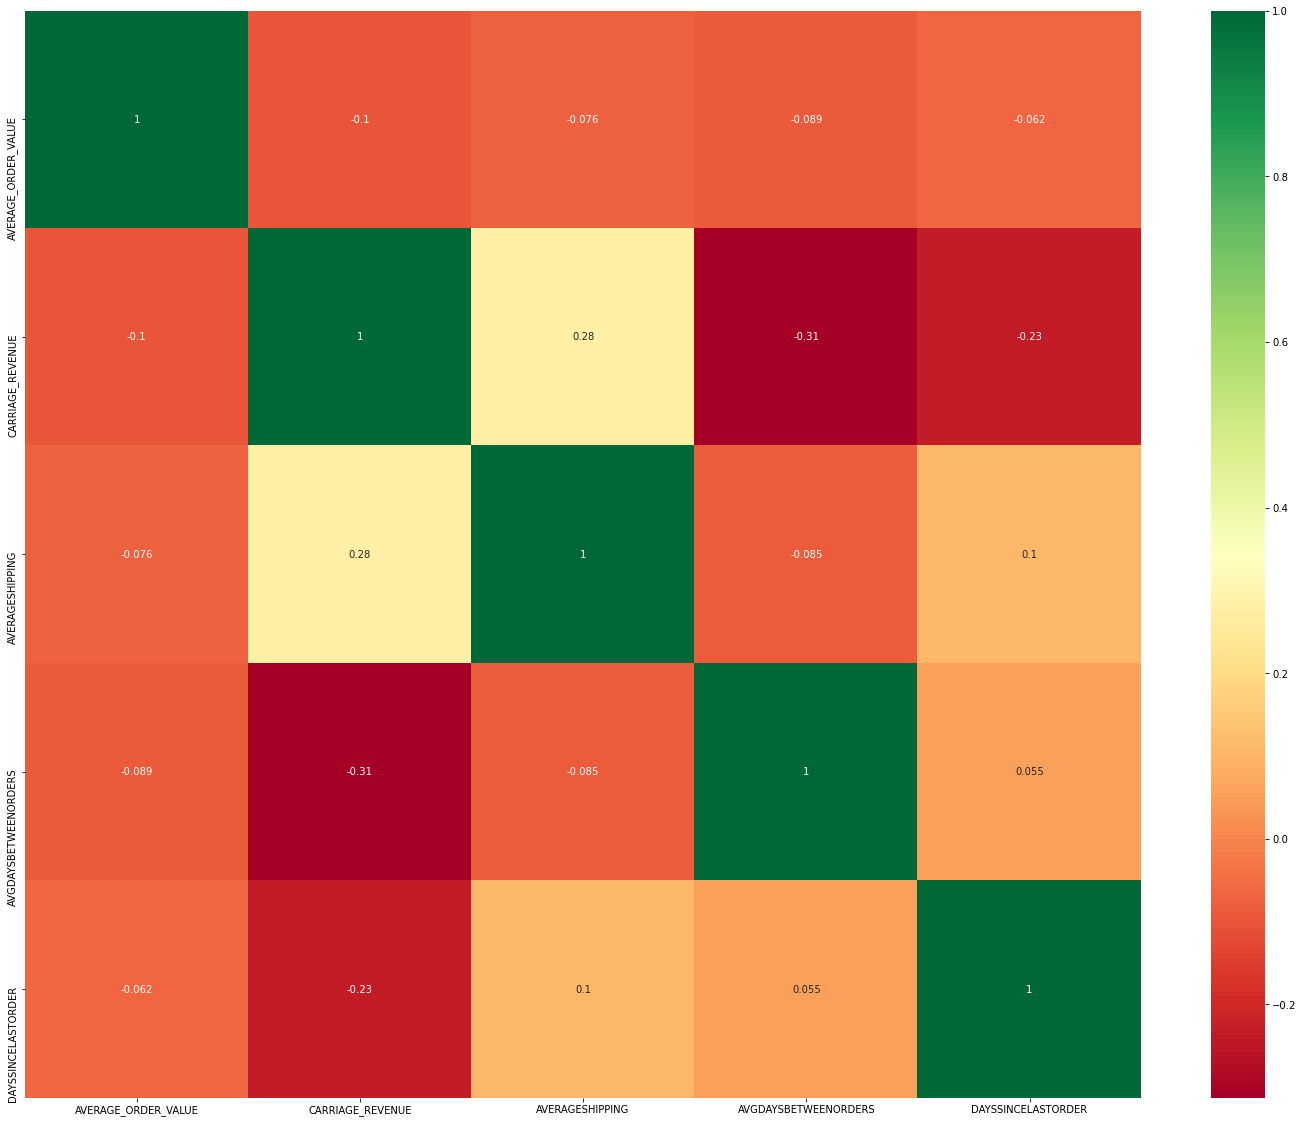

In [31]:
correlations = df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(correlations, annot=True,cmap="RdYlGn")

#### FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [32]:
scaler = StandardScaler()
normalized_df = scaler.fit_transform(df)
normalized_df

array([[ 4.74379334,  5.25256558,  0.63697438, -0.59374408, -0.42945284],
       [ 4.51857009,  3.60617549,  0.05809837, -0.57017602,  0.08209761],
       [ 3.48826101, -0.04316241, -1.36682718, -0.53424629, -0.42945284],
       ...,
       [-1.20650893, -0.73309218,  0.92888621,  4.21044225,  0.50631018],
       [-1.23924487, -0.73309218,  0.92888621,  4.00248882,  0.55621754],
       [-1.34989234, -0.70259574,  0.26590001,  2.54616015, -0.37954548]])

In [33]:
normalized_df.shape

(5000, 5)

In [34]:
wcss_values = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(normalized_df)
    wcss_values.append(kmeans.inertia_)

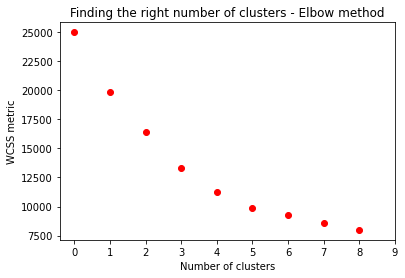

In [35]:
plt.plot(wcss_values,'ro')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS metric')
plt.title('Finding the right number of clusters - Elbow method')
plt.xticks(ticks=range(0,10))
plt.show()

However, the values does not reduce linearly until 3rd cluster

Let's choose the number of clusters to be 2. Note that scale starts with 0 which means we actually pick 3 clusters

### APPLY K-MEANS METHOD

In [36]:
kmeans=KMeans(3)
kmeans.fit(normalized_df)
kmeans.cluster_centers_.shape

(3, 5)

we have 3 centroids with 5 coordinates corresponding to each features of the dataset

In [37]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[df.columns])

In [38]:
labels = kmeans.labels_
labels

array([0, 0, 0, ..., 2, 2, 2])

In [39]:
set(labels)

{0, 1, 2}

In [40]:
labels.shape

(5000,)

In [41]:
# concatenate the clusters labels to our original dataframe
df_with_centroids = pd.concat([df, pd.DataFrame({'centroid':labels})], axis=1)
df_with_centroids  

,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER,centroid
0,96.67,529.59,4.27,14.19,1,0
1,134.46,97.92,1.19,15.89,1,0
2,168.83,171.69,3.99,33.12,1,0
3,158.92,92.82,2.11,21.11,1,0
4,113.88,179.04,3.26,6.65,1,0
...,...,...,...,...,...,...
4995,117.49,4.99,4.99,0.00,207,2
4996,117.49,4.99,4.99,0.00,207,2
4997,117.49,4.99,4.99,0.00,207,2
4998,117.49,4.99,4.99,0.00,207,2


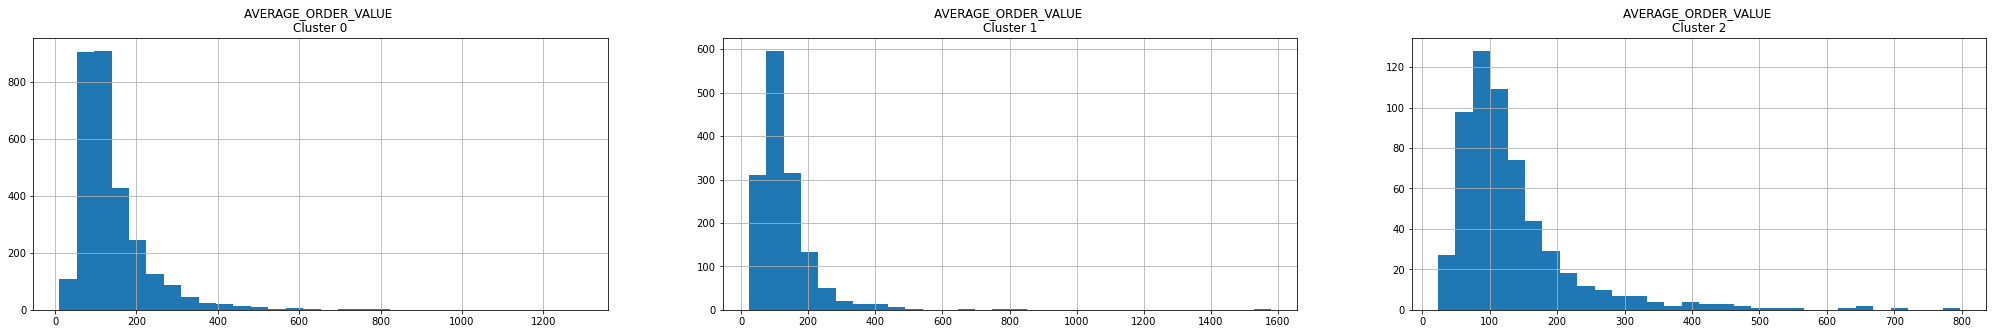

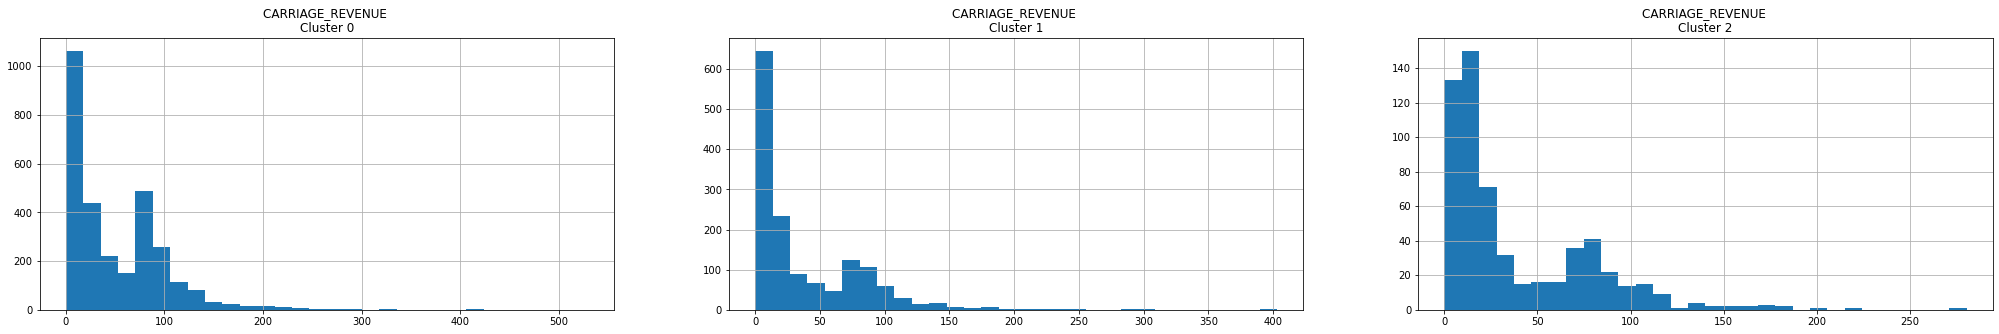

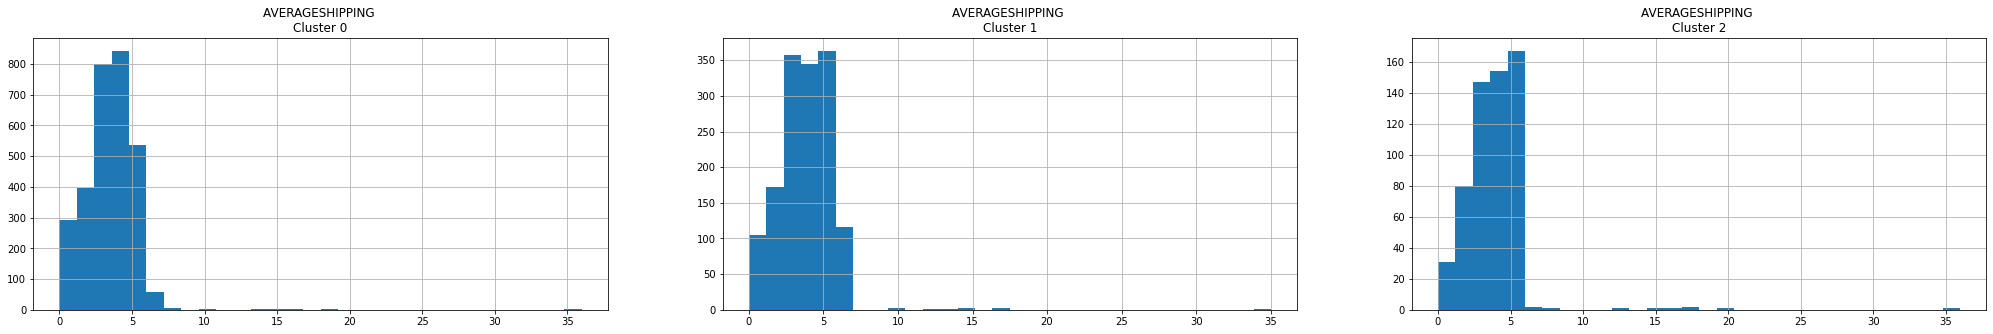

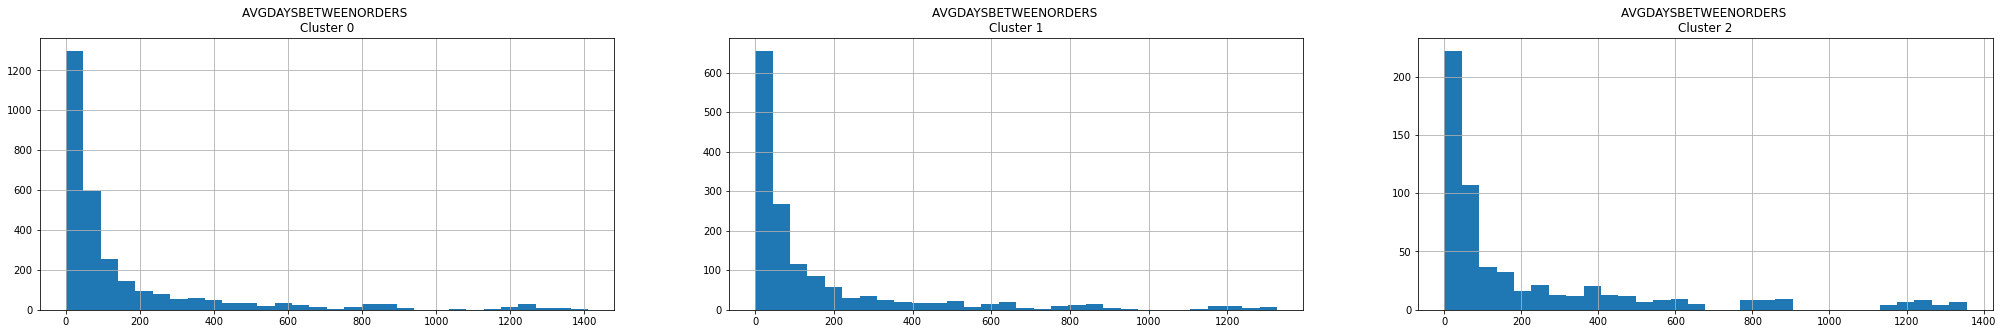

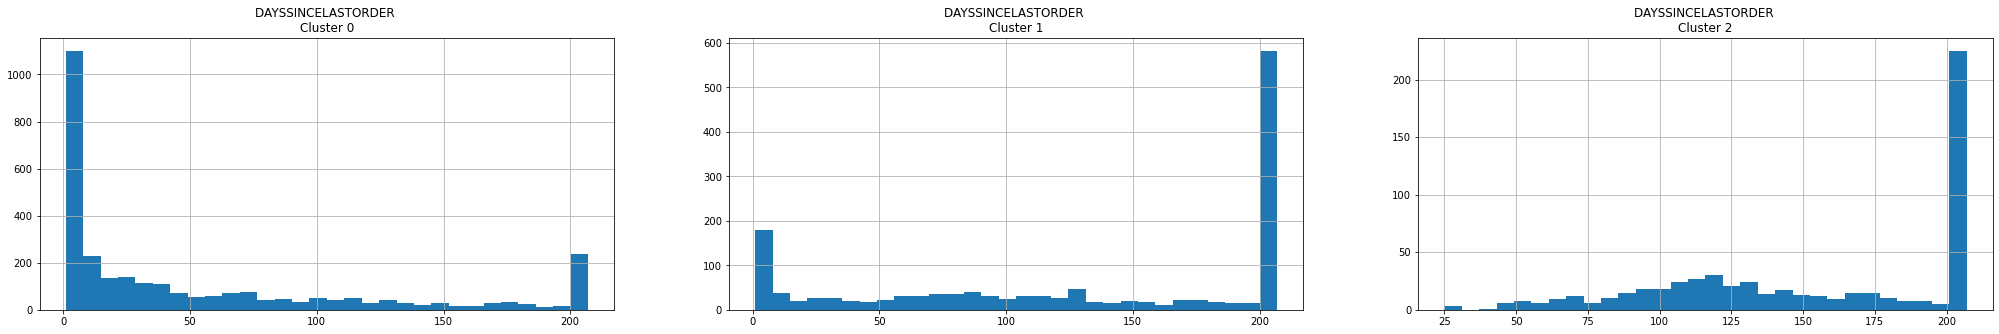

In [42]:
# Plot the histogram of various clusters (one cluster = one column with all features)
for feature in df.columns:
    plt.figure(figsize=(35,5))  
    for centroid in range(3):
        plt.subplot(1,3,centroid+1)
        cluster = df_with_centroids[df_with_centroids.centroid==centroid]
        cluster[feature].hist(bins=30)
        plt.title(f'{feature} \nCluster {centroid}')
plt.show()

In [43]:
cluster_centroids = scaler.inverse_transform(cluster_centers)
cluster_centroids.shape

(3, 5)

In [44]:
cluster_centroids = scaler.inverse_transform(cluster_centers)
cluster_centroids = pd.DataFrame(data=cluster_centroids, columns=[df.columns])
cluster_centroids

,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER
0,143.109432,64.583120,3.659252,71.740044,35.078518
1,132.715453,23.132723,3.685500,103.468550,190.784888
2,113.242683,10.520153,3.027759,768.664822,91.062818


Plot the characteristics of the different clusters using their centroids.

This helps understading the different segments determined with Kmeans

First customer cluster(Potential customers ) which day since last order is very high<br>
Second customer cluster(Champions )which average order value is very high and average day between orders , day since last order is low.<br>
Third customer cluster (Need Attention) which average day between orders is very high



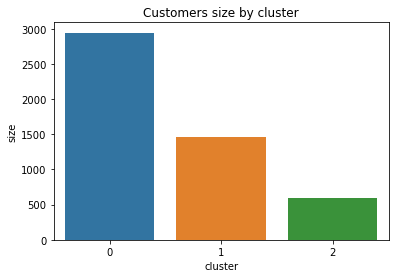

In [45]:
cluster_size = []
for centroid, cluster_df in df_with_centroids.groupby("centroid"):
        cluster_size.append([centroid, len(cluster_df)])
cluster_sizes = pd.DataFrame(cluster_size, columns = ["cluster", "size"])
cluster_sizes.set_index("cluster", drop = True, inplace = True)
sns.barplot(x=cluster_sizes.index, y='size', data=cluster_sizes)
plt.title('Customers size by cluster')
plt.show()

Clearly the  cluster 0 are extremely small .ie, Low active customers are very small amound and they need attention
The cluster 1 are very high , which is highly active  purchaser.also cluster 2 are medium which is potential customers.

In [46]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_df)
principal_components

array([[ 3.95318394,  2.70415173],
       [ 2.43695171,  2.58664523],
       [-0.48064043,  3.07727774],
       ...,
       [-2.32666827, -2.3606899 ],
       [-2.23099547, -2.36506866],
       [-1.47360299, -1.21595724]])

In [47]:
principal_components.shape

(5000, 2)

In [48]:
pca_df = pd.DataFrame(principal_components, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,3.953184,2.704152
1,2.436952,2.586645
2,-0.480640,3.077278
3,6.202479,0.814739
4,-0.588084,3.329217


In [49]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,cluster
0,3.953184,2.704152,0
1,2.436952,2.586645,0
2,-0.480640,3.077278,0
3,6.202479,0.814739,0
4,-0.588084,3.329217,0


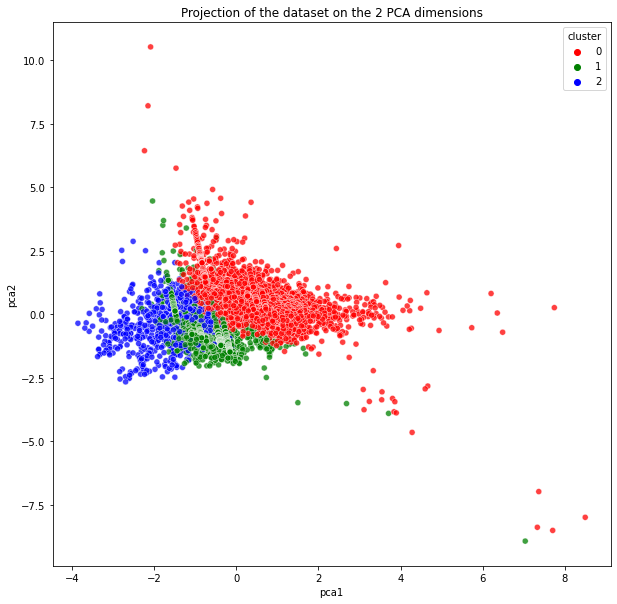

In [50]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='pca1', y='pca2',hue = 'cluster', data = pca_df, palette=['red','green','blue'], alpha=0.75)
plt.title('Projection of the dataset on the 2 PCA dimensions')
plt.show()

In [51]:
# Principal axes in feature space, representing the directions of maximum variance in the data
pca.components_

array([[-0.07714593,  0.69065645,  0.42048517, -0.51407069, -0.27561882],
       [ 0.56950251, -0.00762543, -0.52915194, -0.21081228, -0.59259189]])

In [52]:

pca.explained_variance_ratio_

array([0.30113778, 0.23384507])